## Tree-based classifier/regressor

In [64]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import sys
sys.path.append('..')

from src import trees
import importlib
importlib.reload(trees);


#### Decision tree classifier example with Iris dataset

Data shapes - X_train: (120, 4), X_test: (30, 4),  y_train: (120,),  y_test: (30,)

Accuracy: 1.00

Tree Structure:

If petal length (cm) <= 1.90:
  Leaf: 0
Else:
  If petal length (cm) <= 4.70:
    If petal width (cm) <= 1.60:
      Leaf: 1
    Else:
      Leaf: 2
  Else:
    If petal width (cm) <= 1.70:
      If petal length (cm) <= 4.90:
        Leaf: 1
      Else:
        If petal width (cm) <= 1.50:
          Leaf: 2
        Else:
          Leaf: 1
    Else:
      If petal length (cm) <= 4.80:
        If sepal length (cm) <= 5.90:
          Leaf: 1
        Else:
          Leaf: 2
      Else:
        Leaf: 2


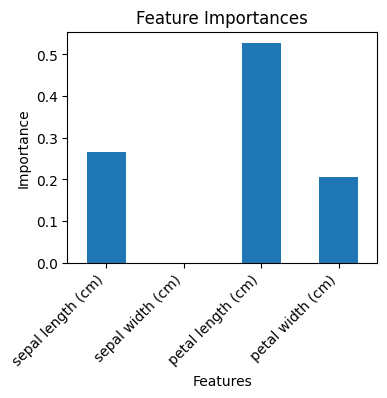

In [43]:
# Example with Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
names = iris.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape},  y_train: {y_train.shape},  y_test: {y_test.shape}\n")

# Create and train the classifier
clf = trees.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the tree structure
print("\nTree Structure:\n")
clf.print_tree(feature_names=names)

# Print the feature importances
featimps = clf.get_feature_importances()
featimps = pd.Series(featimps, index=names)
featimps.plot(kind='bar', figsize=(4, 3))
plt.xticks(rotation=45, ha='right');
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



#### Decision tree classifier example with Wine dataset

Data shapes - X_train: (142, 13), X_test: (36, 13),  y_train: (142,),  y_test: (36,)

Accuracy: 0.92

Tree Structure:



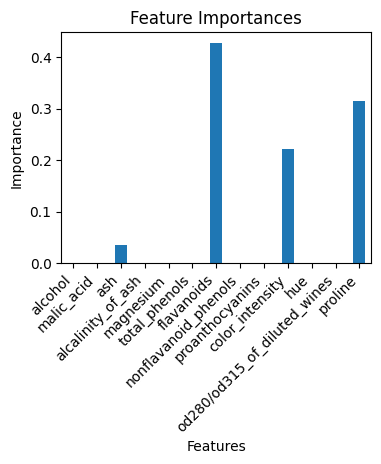

In [45]:
# Example with Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
names = wine.feature_names


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape},  y_train: {y_train.shape},  y_test: {y_test.shape}\n")

# Create and train the classifier
clf = trees.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the tree structure
print("\nTree Structure:\n")
#clf.print_tree(feature_names=names)

# Print the feature importances
featimps = clf.get_feature_importances()
featimps = pd.Series(featimps, index=names)
featimps.plot(kind='bar', figsize=(4, 3))
plt.xticks(rotation=45, ha='right');
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



#### DecisionTreeRegressor with California housing dataset

Data shapes - X_train: (16512, 8), X_test: (4128, 8), y_train: (16512,), y_test: (4128,)

R² Score: 0.67

Tree Structure:



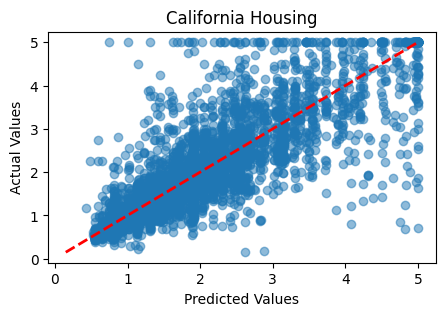

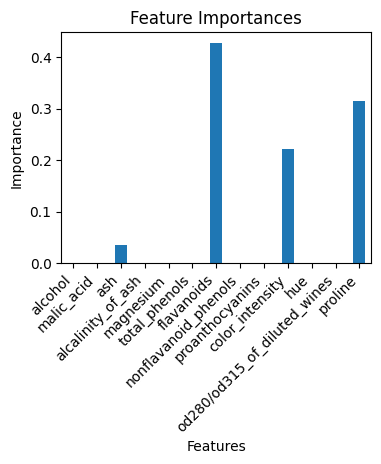

In [46]:
# Example with California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}\n")

# Create and train the regressor
reg = trees.DecisionTreeRegressor(max_depth=10)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

# Print the tree structure
print("\nTree Structure:\n")
#reg.print_tree(feature_names=feature_names)

# Visualize predictions vs actual values
plt.figure(figsize=(5,3))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('California Housing')
plt.show(); plt.close();


# Print the feature importances
featimps = clf.get_feature_importances()
featimps = pd.Series(featimps, index=names)
featimps.plot(kind='bar', figsize=(4, 3))
plt.xticks(rotation=45, ha='right');
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show(); plt.close()

#### RandomForestClassifier with Iris dataset

Data shapes - X_train: (120, 4), X_test: (30, 4),  y_train: (120,),  y_test: (30,)

Accuracy: 1.00


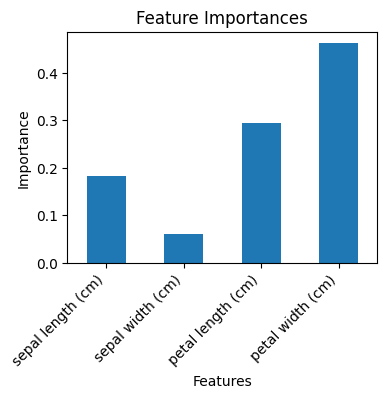

In [56]:
# Example with Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
names = iris.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape},  y_train: {y_train.shape},  y_test: {y_test.shape}\n")

# Create and train the classifier
clf = trees.RandomForestClassifier(n_estimators=10, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Print the feature importances
featimps = clf.get_feature_importances()
featimps = pd.Series(featimps, index=names)
featimps.plot(kind='bar', figsize=(4, 3))
plt.xticks(rotation=45, ha='right');
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



#### RandomForestClassifier with Wine dataset

Data shapes - X_train: (142, 13), X_test: (36, 13),  y_train: (142,),  y_test: (36,)

Accuracy: 0.97


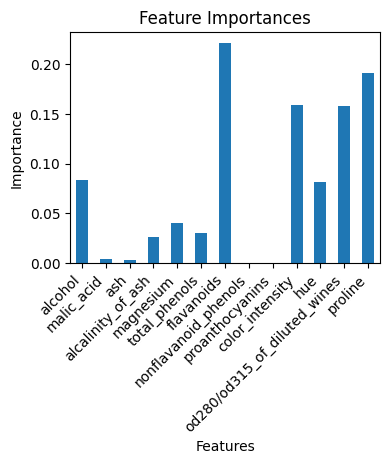

In [66]:
# Example with Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
names = wine.feature_names


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape},  y_train: {y_train.shape},  y_test: {y_test.shape}\n")

# Create and train the classifier
clf = trees.RandomForestClassifier(n_estimators=10, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Print the feature importances
featimps = clf.get_feature_importances()
featimps = pd.Series(featimps, index=names)
featimps.plot(kind='bar', figsize=(4, 3))
plt.xticks(rotation=45, ha='right');
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



#### RandomForestRegressor with Housing dataset

Data shapes - X_train: (16512, 8), X_test: (4128, 8), y_train: (16512,), y_test: (4128,)

R² Score: 0.64


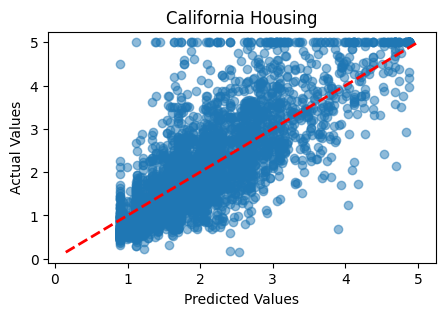

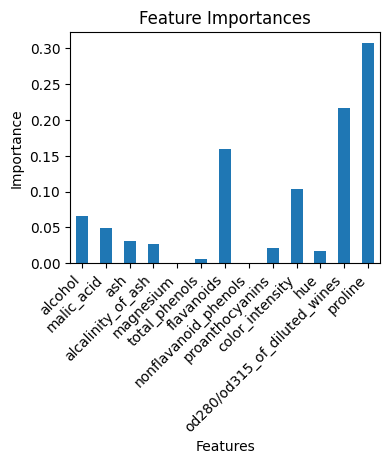

In [65]:
# Example with California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}\n")

# Create and train the regressor
reg = trees.RandomForestRegressor(n_estimators=10, max_depth=5)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


# Visualize predictions vs actual values
plt.figure(figsize=(5,3))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('California Housing')
plt.show(); plt.close();


# Print the feature importances
featimps = clf.get_feature_importances()
featimps = pd.Series(featimps, index=names)
featimps.plot(kind='bar', figsize=(4, 3))
plt.xticks(rotation=45, ha='right');
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show(); plt.close()